In [1]:
import wrds
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
conn=wrds.Connection()

Enter your WRDS username [yjaey]: yjaeyoon
Enter your password: ···············


WRDS recommends setting up a .pgpass file.


Create .pgpass file now [y/n]?:  y


Created .pgpass file successfully.
Loading library list...
Done


### COMPUSTAT - company

In [3]:
df= conn.raw_sql("""select * 
                    from comp.company
                    """,
                  date_cols=['datadate'])
conn.close()
df.shape

(51812, 39)

In [4]:
df= df[['conm', 'gvkey', 'cik', 'fic', 'sic', 'state', 'ipodate']]
print(df.shape)
df.head()

(51812, 7)


,conm,gvkey,cik,fic,sic,state,ipodate
0,A & E PLASTIK PAK INC,001000,None,USA,3089,None,None
1,A & M FOOD SERVICES INC,001001,0000723576,USA,5812,OK,None
2,AAI CORP,001002,0001306124,USA,3825,MD,None
3,A.A. IMPORTING CO INC,001003,0000730052,USA,5712,MO,None
4,AAR CORP,001004,0000001750,USA,5080,IL,1988-01-01


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 51812 entries, 0 to 51811
Data columns (total 7 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   conm     51812 non-null  object
 1   gvkey    51812 non-null  object
 2   cik      35404 non-null  object
 3   fic      50646 non-null  object
 4   sic      50578 non-null  object
 5   state    45047 non-null  object
 6   ipodate  16144 non-null  object
dtypes: object(7)
memory usage: 2.8+ MB


In [6]:
df=df.dropna(subset=['sic'])
df.shape

(50578, 7)

In [7]:
df['sic']= df['sic'].astype(int)
df.loc[((df['sic']<7000) & (df['sic']>=6000)), 'industry']= 'finance'
df.loc[df['sic']>=9900, 'industry']= 'not defined'
df.loc[(df['industry'].isna()), 'industry']= 'non-finance'
df.head()

,conm,gvkey,cik,fic,sic,state,ipodate,industry
0,A & E PLASTIK PAK INC,001000,None,USA,3089,None,None,non-finance
1,A & M FOOD SERVICES INC,001001,0000723576,USA,5812,OK,None,non-finance
2,AAI CORP,001002,0001306124,USA,3825,MD,None,non-finance
3,A.A. IMPORTING CO INC,001003,0000730052,USA,5712,MO,None,non-finance
4,AAR CORP,001004,0000001750,USA,5080,IL,1988-01-01,non-finance


In [8]:
df.groupby('industry').count()

,conm,gvkey,cik,fic,sic,state,ipodate
industry,,,,,,,
finance,14302,14302,6918,14069,14302,13465,2836
non-finance,34431,34431,27032,34429,34431,29806,11737
not defined,1845,1845,1378,1843,1845,1605,1246


In [9]:
df=df[df.fic=="USA"].drop(columns="fic")
print(df.shape)

(38248, 7)


In [10]:
df=df[df.ipodate.notna()]
print(df.shape)

(12107, 7)


In [11]:
df.groupby('industry').count()

,conm,gvkey,cik,sic,state,ipodate
industry,,,,,,
finance,2306,2306,2182,2306,2294,2306
non-finance,9014,9014,8544,9014,8895,9014
not defined,787,787,594,787,765,787


In [12]:
df['ipoyear']= pd.DatetimeIndex(df['ipodate']).year

In [13]:
df.shape

(12107, 8)

### Histogram using the full sample

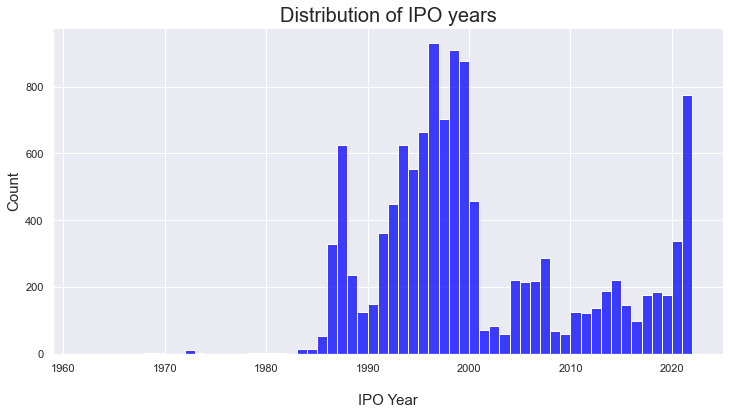

In [14]:
sns.set(rc={'figure.figsize':(12, 6)})
ax= sns.histplot(df, x='ipoyear', binwidth= 1, color= 'blue')
ax.set_title("Distribution of IPO years", fontsize= 20)
ax.set_xlabel("\nIPO Year", fontsize= 15)
ax.set_ylabel("Count", fontsize= 15)

plt.show()

### Histogram using the sample since 1990

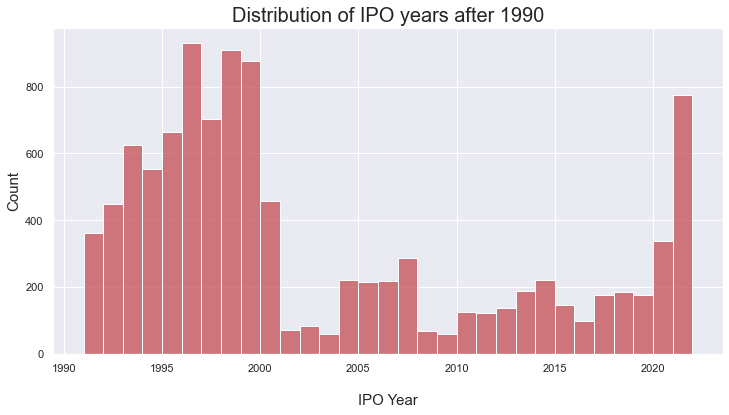

In [15]:
df_to_visualize= df[df['ipoyear']>=1990]

sns.set(rc={'figure.figsize':(12, 6)})
ax= sns.histplot(df, x='ipoyear', binwidth= 1, color= 'r')
ax.set_title("Distribution of IPO years after 1990", fontsize= 20)
ax.set_xlabel("\nIPO Year", fontsize= 15)
ax.set_ylabel("Count", fontsize= 15)
plt.show()

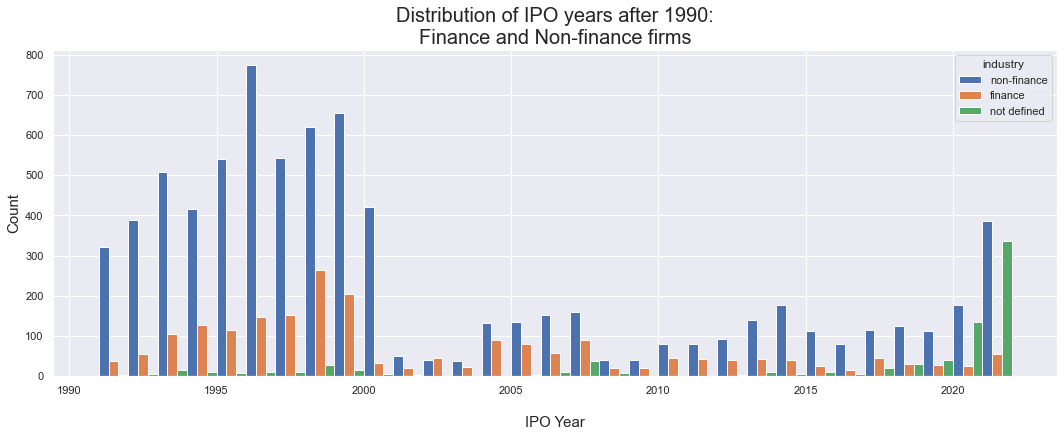

In [20]:
df_to_visualize= df[df['ipoyear']>=1990]

sns.set(rc={'figure.figsize':(18, 6)})
ax= sns.histplot(df_to_visualize, 
                 x='ipoyear', binwidth= 1, hue='industry', alpha= 1, multiple='dodge')
ax.set_title("Distribution of IPO years after 1990:\nFinance and Non-finance firms", fontsize= 20)
ax.set_xlabel("\nIPO Year", fontsize= 15)
ax.set_ylabel("Count", fontsize= 15)
plt.show()

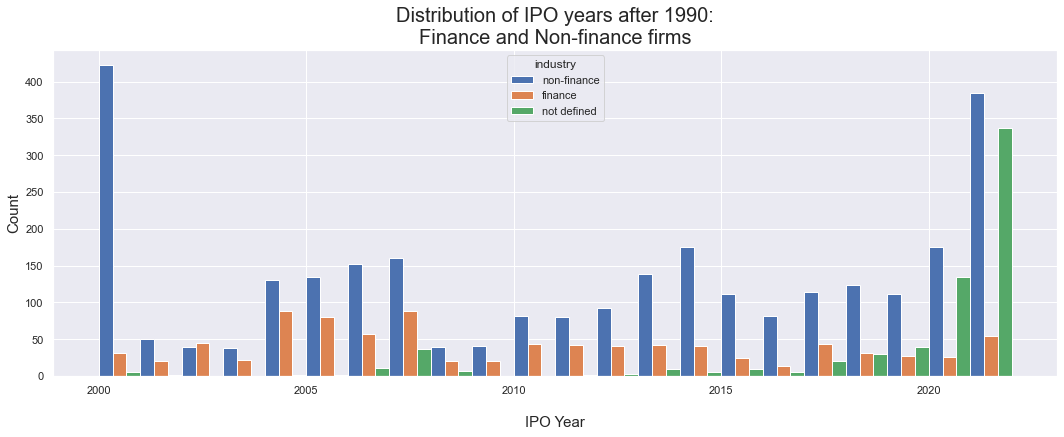

In [28]:
df_to_visualize= df[df['ipoyear']>=2000]

sns.set(rc={'figure.figsize':(18, 6)})
ax= sns.histplot(df_to_visualize, 
                 x='ipoyear', binwidth= 1, hue='industry', alpha= 1, multiple='dodge')
ax.set_title("Distribution of IPO years after 1990:\nFinance and Non-finance firms", fontsize= 20)
ax.set_xlabel("\nIPO Year", fontsize= 15)
ax.set_ylabel("Count", fontsize= 15)
plt.show()

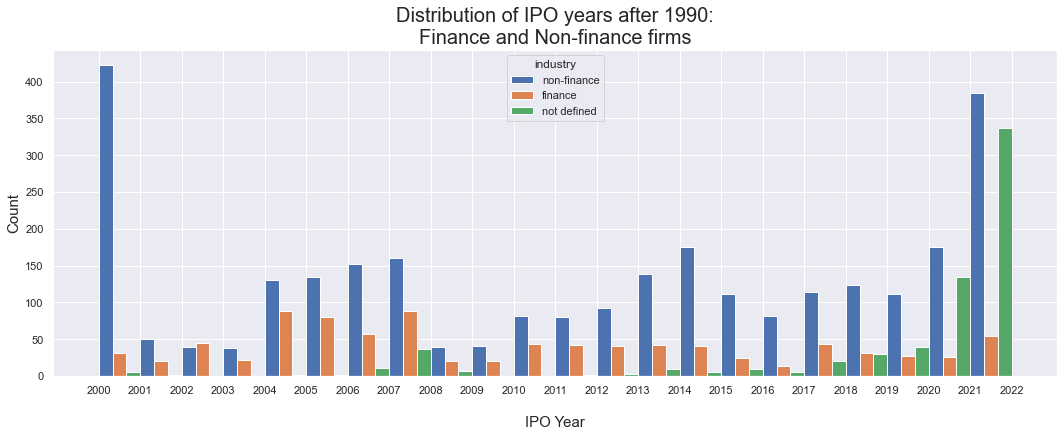

In [33]:
df_to_visualize= df[df['ipoyear']>=2000]

sns.set(rc={'figure.figsize':(18, 6)})
ax= sns.histplot(df_to_visualize, 
                 x='ipoyear', binwidth= 1, hue='industry', alpha= 1, multiple='dodge')
ax.set_title("Distribution of IPO years after 1990:\nFinance and Non-finance firms", fontsize= 20)
ax.set_xlabel("\nIPO Year", fontsize= 15)
ax.set_xticks(range(2000,2023))
ax.set_ylabel("Count", fontsize= 15)
plt.show()

--------